https://www.kaggle.com/fayomi/advertising

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 10,8
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local").getOrCreate()

In [17]:
df = pd.read_csv('advertising/advertising.csv')
sdf = spark.read.csv('advertising/advertising.csv', header=True)

In [18]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [19]:
sdf.registerTempTable('advertising')

### サマリ

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [22]:
sdf.summary().toPandas()

,summary,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
1,mean,65.00020000000012,36.009,55000.00008000003,180.00010000000003,None,None,0.481,None,None,0.5
2,stddev,15.853614567500212,8.785562310125924,13414.634022282358,43.9023393019801,None,None,0.49988887654046543,None,None,0.5002501876563867
3,min,32.6,19,13996.5,104.78,Adaptive 24hour Graphic Interface,Adamsbury,0,Afghanistan,2016-01-01 02:52:10,0
4,25%,51.3,29.0,46974.15,138.71,None,None,0.0,None,None,0.0
5,50%,68.18,35.0,57009.76,182.84,None,None,0.0,None,None,0.0
6,75%,78.54,42.0,65461.92,218.79,None,None,1.0,None,None,1.0
7,max,91.43,61,79484.8,269.96,Visionary reciprocal circuit,Zacharyton,1,Zimbabwe,2016-07-24 00:22:16,1


### ヒストグラム

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BB73C36D68>,
      dtype=object)

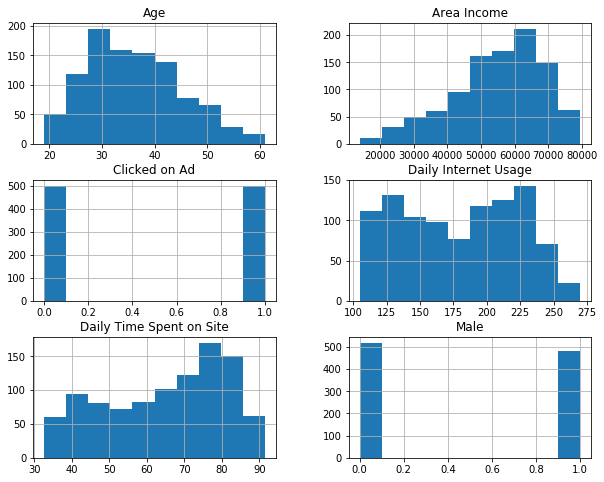

In [15]:
df.hist()

### クリック有無毎の各平均値

In [36]:
spark.sql('''
SELECT
  `Clicked on Ad`
  , AVG(Age) AS avg_age
  , AVG(`Area Income`) AS avg_area_income
  , AVG(`Daily Internet Usage`) AS avg_daily_interest_usage
  , AVG(Male) AS avg_male
  , AVG(`Daily Time Spent on Site`) AS avg_daily_time
FROM
  advertising
GROUP BY
  `Clicked on Ad`
''').show()

+-------------+-------+------------------+------------------------+--------+-----------------+
|Clicked on Ad|avg_age|   avg_area_income|avg_daily_interest_usage|avg_male|   avg_daily_time|
+-------------+-------+------------------+------------------------+--------+-----------------+
|            0| 31.684| 61385.58641999997|      214.51373999999979|     0.5|76.85461999999998|
|            1| 40.334|48614.413739999996|      145.48646000000005|   0.462|53.14577999999996|
+-------------+-------+------------------+------------------------+--------+-----------------+



### CTR時間依存性

In [70]:
pdf_hour = spark.sql('''
SELECT
  HOUR(to_timestamp(timestamp)) AS hour
  , SUM(`Clicked on Ad`) / COUNT(`Clicked on Ad`) AS CTR
FROM
  advertising
GROUP BY
  HOUR(to_timestamp(timestamp))
ORDER BY
  hour
''').toPandas()

In [71]:
pdf_hour

,hour,CTR
0,0,0.577778
1,1,0.500000
2,2,0.472222
3,3,0.547619
4,4,0.500000
5,5,0.477273
6,6,0.589744
7,7,0.481481
8,8,0.488372
9,9,0.571429


<BarContainer object of 24 artists>

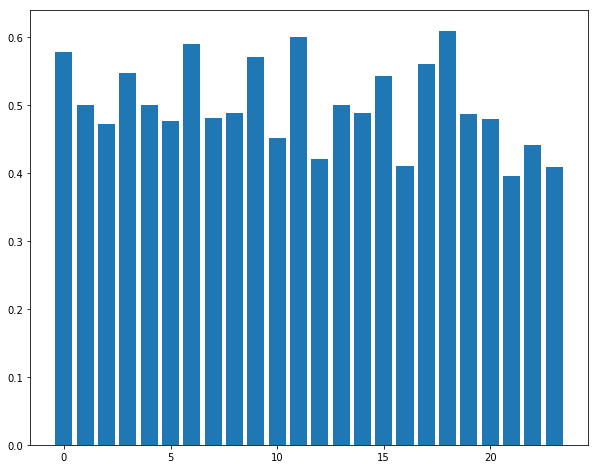

In [73]:
plt.bar(pdf_hour['hour'], pdf_hour['CTR'])

In [75]:
pdf_day = spark.sql('''
SELECT
  DAY(to_timestamp(timestamp)) AS day
  , SUM(`Clicked on Ad`) / COUNT(`Clicked on Ad`) AS CTR
FROM
  advertising
GROUP BY
  DAY(to_timestamp(timestamp))
ORDER BY
  day
''').toPandas()

In [76]:
pdf_day

,day,CTR
0,1,0.575758
1,2,0.400000
2,3,0.565217
3,4,0.388889
4,5,0.514286
5,6,0.560000
6,7,0.437500
7,8,0.428571
8,9,0.588235
9,10,0.513514


<BarContainer object of 31 artists>

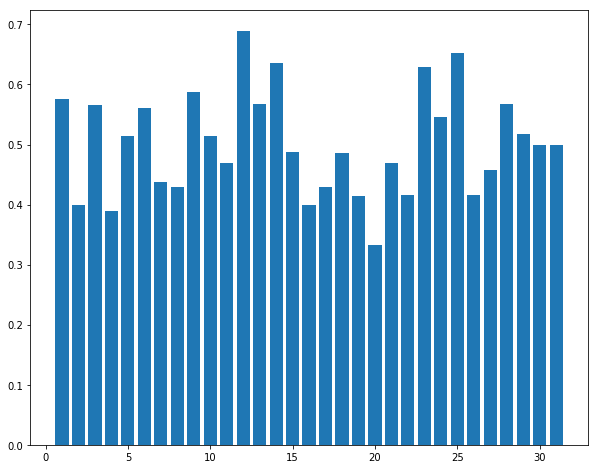

In [78]:
plt.bar(pdf_day['day'], pdf_day['CTR'])

In [79]:
pdf_month = spark.sql('''
SELECT
  MONTH(to_timestamp(timestamp)) as month
  , SUM(`Clicked on Ad`) / COUNT(`Clicked on Ad`) AS CTR
FROM
  advertising
GROUP BY
  MONTH(to_timestamp(timestamp))
ORDER BY
  month
''').toPandas()

In [80]:
pdf_month

,month,CTR
0,1,0.469388
1,2,0.518750
2,3,0.474359
3,4,0.503401
4,5,0.537415
5,6,0.500000
6,7,0.495050


<BarContainer object of 7 artists>

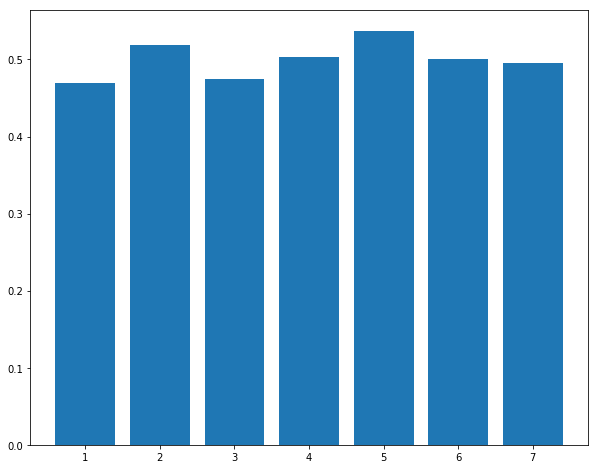

In [81]:
plt.bar(pdf_month['month'], pdf_month['CTR'])

In [48]:
pdf_male = sdf.where('Male = 1').toPandas()
pdf_female = sdf.where('Male = 0').toPandas()

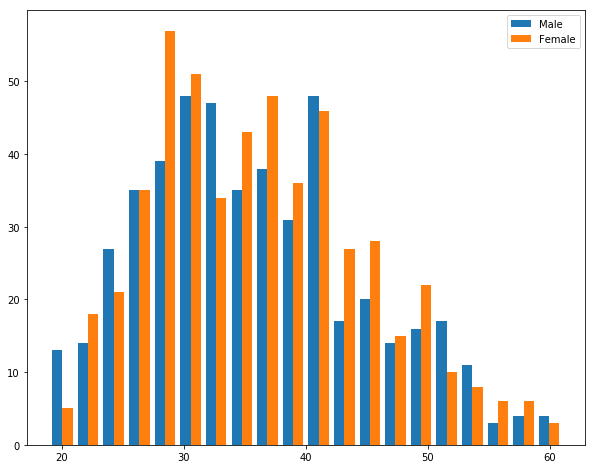

In [64]:
plt.hist([pdf_male['Age'].astype(int), pdf_female['Age'].astype(int)], bins=20, stacked=False, label=['Male', 'Female'])
plt.legend()

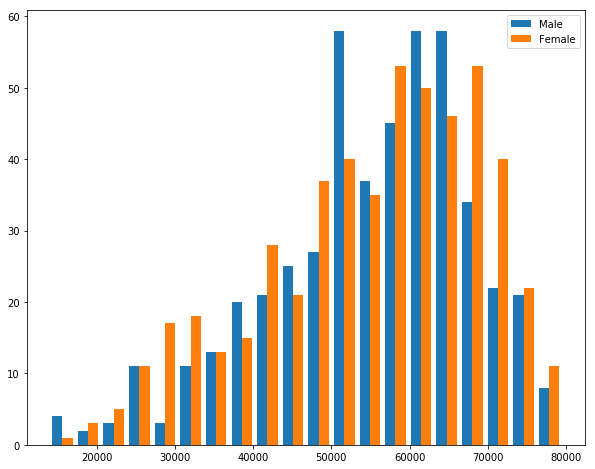

In [66]:
plt.hist([pdf_male['Area Income'].astype(float), pdf_female['Area Income'].astype(float)], bins=20, stacked=False, label=['Male', 'Female'])
plt.legend()

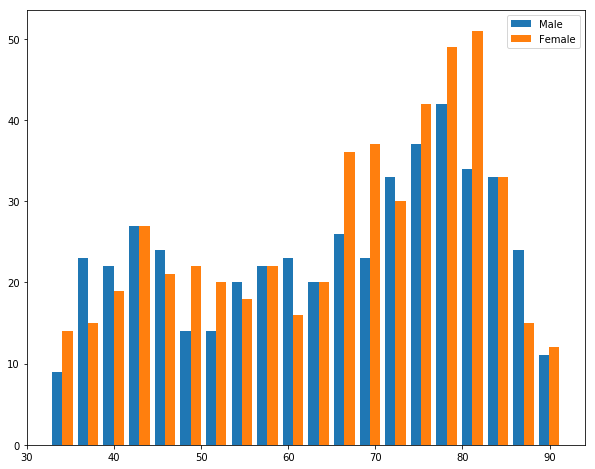

In [67]:
plt.hist([pdf_male['Daily Time Spent on Site'].astype(float), pdf_female['Daily Time Spent on Site'].astype(float)], bins=20, stacked=False, label=['Male', 'Female'])
plt.legend()

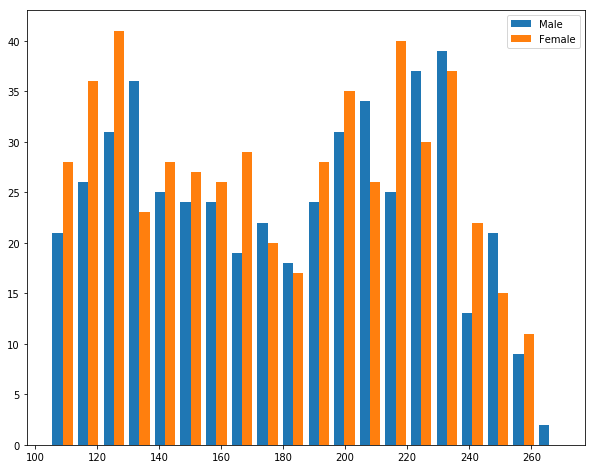

In [68]:
plt.hist([pdf_male['Daily Internet Usage'].astype(float), pdf_female['Daily Internet Usage'].astype(float)], bins=20, stacked=False, label=['Male', 'Female'])
plt.legend()